# Imports

In [1]:
from scapy.all import *

In [2]:
from impacket.structure import Structure

# About

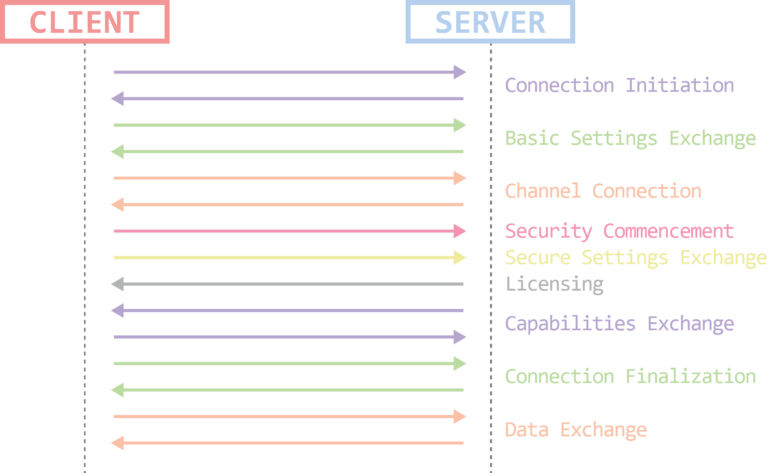

The RDP connection can be broken down into a few stages:

- Connection Initiation
- Basic Settings Exchange
- Channel Connection
- Security Commencement
- Secure Settings Exchange
- Licensing
- Capabilities Exchange
- Connection Finalization
- Data Exchange

## thinking proccess

I probably should check whats happenning in some of the stages: <br>
1) Connection initation - could contais valuavle information about the machine that i am connecting to (probably like ntlm challange or something) whichmeans that maybe i can get RDP version\build or SSP version and it could relate.<br>
2) maybe from basic settings exchange i can get the os in plain? i need to check

* i should not pass the security settings exchange.

Found out that i have minor and major versions :) i will use them.

minor and major wont be enough cause in Windows 7 and Windows2008R2 are the same.<br>
I will try to use more fields to conclude.

## Wireshark stuff

I have decrypted the SSL with wireshark and this is the result.

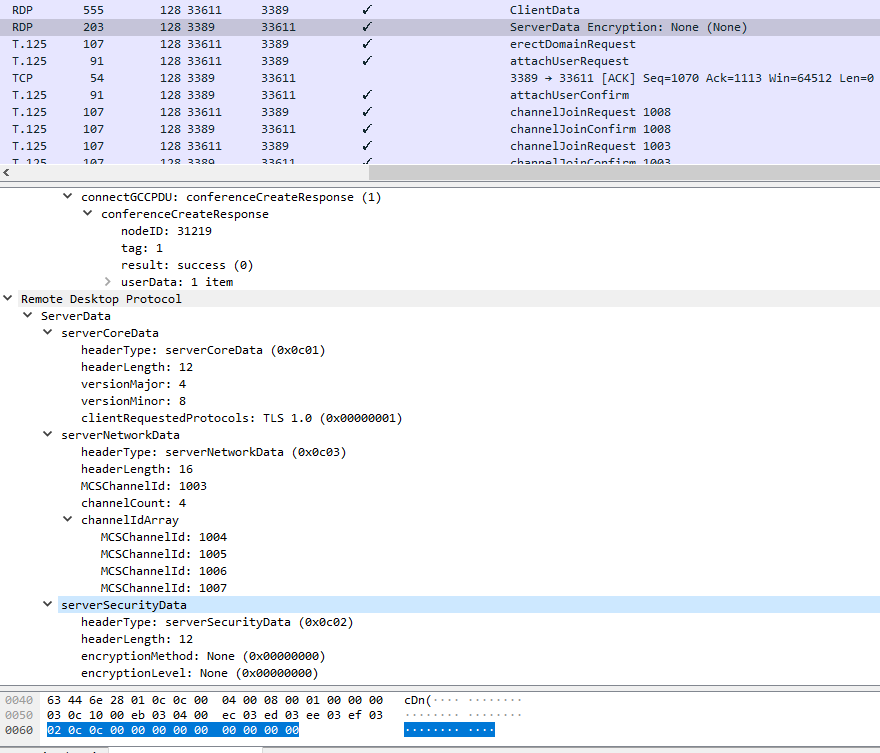

### note 1

in this picture i manage to find the vesions of the server, however i got this information after decrypting the session. which is not good for me cause it will be hard to decrypt the session on going. [i will try this later on].

### note 2

maybe JA3 could help me. but i am not sure the TLS options will be diffrent from one machine to another.

### note 3

i will try to use ntlm nego

### note 4

window size

### windows 7

In [408]:
server_data = rdp_session("192.168.88.128")

[ + ] sending Client MCS Connect Initial PDU request packet -->
[ + ] <-- received 0x70 bytes from host: 192.168.88.128
[ + ] sending Client MCS Domain Request PDU packet -->
[ + ] sending Client MCS Attach User PDU request packet -->
[ + ] <-- received 0xb bytes from host: 192.168.88.128
[ + ] sending MCS Channel Join Request PDU packets -->
[ + ] <-- received 0xf bytes from channel 1001 on host: 192.168.88.128
[ + ] <-- received 0xf bytes from channel 1002 on host: 192.168.88.128
[ + ] <-- received 0xf bytes from channel 1003 on host: 192.168.88.128
[ + ] <-- received 0xf bytes from channel 1004 on host: 192.168.88.128
[ + ] <-- received 0xf bytes from channel 1005 on host: 192.168.88.128
[ + ] <-- received 0xf bytes from channel 1006 on host: 192.168.88.128
[ + ] <-- received 0xf bytes from channel 1007 on host: 192.168.88.128
[ + ] sending Client Security Exhcange PDU packets -->
[ + ] <-- received 0x22 bytes from host: 192.168.88.128


### windows 2008r2

In [409]:
vbserver_data2 = rdp_session("13.93.106.72")

[ + ] sending Client MCS Connect Initial PDU request packet -->
[ + ] <-- received 0x70 bytes from host: 13.93.106.72
[ + ] sending Client MCS Domain Request PDU packet -->
[ + ] sending Client MCS Attach User PDU request packet -->
[ + ] <-- received 0xb bytes from host: 13.93.106.72
[ + ] sending MCS Channel Join Request PDU packets -->
[ + ] <-- received 0xf bytes from channel 1001 on host: 13.93.106.72
[ + ] <-- received 0xd bytes from channel 1002 on host: 13.93.106.72
[ + ] <-- received 0xf bytes from channel 1003 on host: 13.93.106.72
[ + ] <-- received 0xf bytes from channel 1004 on host: 13.93.106.72
[ + ] <-- received 0xf bytes from channel 1005 on host: 13.93.106.72
[ + ] <-- received 0xf bytes from channel 1006 on host: 13.93.106.72
[ + ] <-- received 0xf bytes from channel 1007 on host: 13.93.106.72
[ + ] sending Client Security Exhcange PDU packets -->
[ + ] <-- received 0x22 bytes from host: 13.93.106.72


#### windows 7 failed auth

In [376]:
import pandas as pd

In [377]:
pd.read_csv("FailedRDP.csv")

,No.,Time,Source,Destination,Protocol,Length,Time to Live,Source Port,Destination Port,Transport Layer Security,TCP payload,Flags,Info
0,1,0.000000,192.168.88.1,192.168.88.128,TCP,66,128,1029,3389,NaN,NaN,0x002,1029 > 3389 [SYN] Seq=0 Win=64240 Len=0 MSS=...
1,4,0.000461,192.168.88.128,192.168.88.1,TCP,66,128,3389,1029,NaN,NaN,0x012,"3389 > 1029 [SYN, ACK] Seq=0 Ack=1 Win=8192 ..."
2,5,0.000521,192.168.88.1,192.168.88.128,TCP,54,128,1029,3389,NaN,NaN,0x010,1029 > 3389 [ACK] Seq=1 Ack=1 Win=1051136 Len=0
3,6,0.001329,192.168.88.1,192.168.88.128,TLSv1,96,128,1029,3389,�\234\223,0300002a25e00000000000436f6f6b69653a206d737473...,0x018,Ignored Unknown Record
4,7,0.003888,192.168.88.128,192.168.88.1,TCP,54,128,3389,1029,NaN,NaN,0x010,3389 > 1029 [ACK] Seq=1 Ack=43 Win=65536 Len=0
5,8,0.003965,192.168.88.128,192.168.88.1,TLSv1,73,128,3389,1029,�\234\223,030000130ed000001234000201080002000000,0x018,Ignored Unknown Record
6,9,0.058352,192.168.88.1,192.168.88.128,TCP,54,128,1029,3389,NaN,NaN,0x010,1029 > 3389 [ACK] Seq=43 Ack=20 Win=1051136 ...
7,10,5.846232,192.168.88.1,192.168.88.128,TLSv1,239,128,1029,3389,�\234\223,16030300b4010000b003036169458ac20f042786154eb9...,0x018,Client Hello
8,11,5.847158,192.168.88.128,192.168.88.1,TLSv1,896,128,3389,1029,�\234\223,16030103450200004d03016169458bd44e8067a74070bc...,0x018,"Server Hello, Certificate, Server Hello Done"
9,12,5.847779,192.168.88.1,192.168.88.128,TLSv1,380,128,1029,3389,�\234\223,1603010106100001020100a23a177830a1d70fe15c9713...,0x018,"Client Key Exchange, Change Cipher Spec, Encry..."


not intresting tho

# Send RDP packet - no paramerters

using https://docs.microsoft.com/en-us/openspecs/windows_protocols/ms-rdpbcgr/18a27ef9-6f9a-4501-b000-94b1fe3c2c10

In [399]:
from rdp_os_enumerator import rdp_session 
from rdp import *

In [541]:
def rdp_session(ip):
    tpkt = TPKT()
    tpdu = TPDU()
    rdp_neg = RDP_NEG_REQ()
    rdp_neg['Type'] = TYPE_RDP_NEG_REQ
    rdp_neg['requestedProtocols'] = PROTOCOL_SSL
    tpdu['VariablePart'] = rdp_neg.getData()
    tpdu['Code'] = TPDU_CONNECTION_REQUEST
    tpkt['TPDU'] = tpdu.getData()

    results = socket_connection(tpkt.getData(), ip, receive_size=1024)
    ctx = SSL.Context(SSL.TLSv1_METHOD)
    tls = SSL.Connection(ctx, results[1])
    tls.set_connect_state()
    tls.do_handshake()

    # initialization packets (X.224)
    info("sending Client MCS Connect Initial PDU request packet -->")
    tls.sendall(DoPduConnectionSequence().mcs_connect_init_pdu())
    server_data = tls.recv(8000)
    info(
        "<-- received {} bytes from host: {}".format(hex(len(server_data)), ip))
    return server_data
    server_response1 = ServerResponseParser(server_data)


    # erect domain and attach user to domain
    info("sending Client MCS Domain Request PDU packet -->")
    tls.sendall(DoPduConnectionSequence().domain_request_pdu())
    info("sending Client MCS Attach User PDU request packet -->")
    tls.sendall(DoPduConnectionSequence(
    ).mcs_attach_user_request_pdu())
    returned_packet = tls.recv(8000)
    info(
        "<-- received {} bytes from host: {}".format(hex(len(returned_packet)), ip))

    # send join requests on ridiculously high channel numbers to trigger the bug
    info("sending MCS Channel Join Request PDU packets -->")

    pdus = DoPduConnectionSequence().do_join_request()
    for pdu in pdus:
        tls.sendall(pdu)
        channel_number = int(Packer(pdu).bin_pack()[-4:], 16)
        returned_packet = tls.recv(1024)
        info("<-- received {} bytes from channel {} on host: {}".format(
            hex(len(returned_packet)), channel_number, ip
        ))

    # my personal favorite is the security exchange, took me awhile to figure this one out
    info("sending Client Security Exhcange PDU packets -->")
    tls.sendall(DoPduConnectionSequence(
    ).do_client_security_pdu_exchange())
    tls.sendall(DoPduConnectionSequence().client_info_pdu())
    returned_packet = tls.recv(8000)
    info("<-- received {} bytes from host: {}".format(
        hex(len(returned_packet)), ip
    ))
    server_error = returned_packet
    return server_error


In [404]:
server_data = rdp_session("192.168.88.128")

[ + ] sending Client MCS Connect Initial PDU request packet -->
[ + ] <-- received 0x70 bytes from host: 192.168.88.128
[ + ] sending Client MCS Domain Request PDU packet -->
[ + ] sending Client MCS Attach User PDU request packet -->
[ + ] <-- received 0xb bytes from host: 192.168.88.128
[ + ] sending MCS Channel Join Request PDU packets -->
[ + ] <-- received 0xf bytes from channel 1001 on host: 192.168.88.128
[ + ] <-- received 0xf bytes from channel 1002 on host: 192.168.88.128
[ + ] <-- received 0xf bytes from channel 1003 on host: 192.168.88.128
[ + ] <-- received 0xf bytes from channel 1004 on host: 192.168.88.128
[ + ] <-- received 0xf bytes from channel 1005 on host: 192.168.88.128
[ + ] <-- received 0xf bytes from channel 1006 on host: 192.168.88.128
[ + ] <-- received 0xf bytes from channel 1007 on host: 192.168.88.128
[ + ] sending Client Security Exhcange PDU packets -->
[ + ] <-- received 0x22 bytes from host: 192.168.88.128


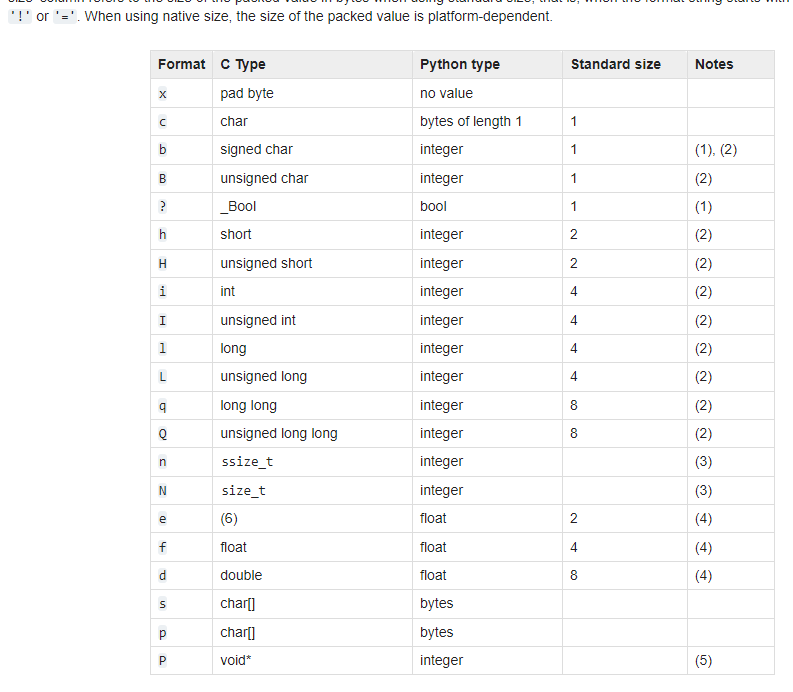

In [391]:
class ServerResponseParser(Structure):
        commonHdr = (
        ('TPKTVersion', 'B=3'),
        ('TPKTReserved', 'B=0'),
        ('TPKTLength', '>H=len(TPDU)+4'),
        ('_TPDU', '_-TPDU', 'self["TPKTLength"]-4'),
        ('x224length', 'B=0'),
        ('x224pduType', 'B=0'),
        ('x224Number', 'B=0'),
        ('idk1', 'H'),
        ('connect-response', 'B'),
        ('idk2', 'H'),
        ('rt-successful', 'B'),
        ('idk3', 'H'),
        ('calledConnectId', 'B'),
        ('idk4', 'H'),
        ('idk5', 'H'),
        ('maxChannelIds', 'B'),
        ('idk6', 'H'),
        ('maxUserIds', 'B'),
        ('idk7', 'H'),
        ('maxTokenIds', 'B'),
        ('idk8', 'H'),
        ('numPriorities', 'B'),
        ('idk9', 'H'),
        ('minThoughtput', 'B'),
        ('idk10', 'H'),
        ('maxHeight', 'B'),
        ('idk11', 'H'),
        ('maxMcsPDUsize', 'H'),
        ('idk12', 'H'),
        ('idk13', 'B'),
        ('protocolVersion', 'B'),
        ('idk14', 'H'), 
        ('idk15', 'H'), 
        ('t124Identifier', '<L=5'),  
        ('idk16', 'H'), 
        ('NodeID', 'H'),
        ('tag', 'H'),
        ('result', 'B'),
        ('idk17', 'B'),
        ('h221NonStandard', '<L=%s'),
        ('idk18', 'H'),
        ('idk19', 'H'),
        ('serverCoreData', 'H'),
        ('headerLength', 'H'),
        ('versionMajor', 'H'),
        ('versionMinor', 'H'),
        ('ClientRequestProtocols', 'I'),
        ('serverNetworkData', 'H'),
            ('headerLength2', 'H'),
            ('MSCSChannelId1', 'H'),
            ('channelCount', 'H'),
            ('MSCSChannelId1', 'H'),
            ('MSCSChannelId2', 'H'),
            ('MSCSChannelId3', 'H'),
            ('MSCSChannelId4', 'H'),
            ('MSCSChannelId5', 'H'),
            ('pad', 'H'),
            ('serverSecurityData', 'H'),
            ('headerLength3', 'H'),
            ('encMethod', 'i'),
            ('enclvl', 'i'),
        ('rest', ':=""'),
    )

In [392]:
server_data

b'\x03\x00\x00p\x02\xf0\x80\x7fff\n\x01\x00\x02\x01\x000\x1a\x02\x01"\x02\x01\x03\x02\x01\x00\x02\x01\x01\x02\x01\x00\x02\x01\x01\x02\x03\x00\xff\xf8\x02\x01\x02\x04B\x00\x05\x00\x14|\x00\x01*\x14v\n\x01\x01\x00\x01\xc0\x00McDn,\x01\x0c\x0c\x00\x04\x00\x08\x00\x01\x00\x00\x00\x03\x0c\x14\x00\xeb\x03\x05\x00\xec\x03\xed\x03\xee\x03\xef\x03\xf0\x03\x00\x00\x02\x0c\x0c\x00\x00\x00\x00\x00\x00\x00\x00\x00'

In [393]:
ServerResponseParser(server_data).fields

{'TPKTVersion': 3,
 'TPKTReserved': 0,
 'TPKTLength': 112,
 '_TPDU': 108,
 'x224length': 2,
 'x224pduType': 240,
 'x224Number': 128,
 'idk1': 26239,
 'connect-response': 102,
 'idk2': 266,
 'rt-successful': 0,
 'idk3': 258,
 'calledConnectId': 0,
 'idk4': 6704,
 'idk5': 258,
 'maxChannelIds': 34,
 'idk6': 258,
 'maxUserIds': 3,
 'idk7': 258,
 'maxTokenIds': 0,
 'idk8': 258,
 'numPriorities': 1,
 'idk9': 258,
 'minThoughtput': 0,
 'idk10': 258,
 'maxHeight': 1,
 'idk11': 770,
 'maxMcsPDUsize': 65280,
 'idk12': 760,
 'idk13': 1,
 'protocolVersion': 2,
 'idk14': 16900,
 'idk15': 1280,
 't124Identifier': 8131584,
 'idk16': 10753,
 'NodeID': 30228,
 'tag': 266,
 'result': 1,
 'idk17': 0,
 'h221NonStandard': 1291894785,
 'idk18': 17507,
 'idk19': 11374,
 'serverCoreData': 3073,
 'headerLength': 12,
 'versionMajor': 4,
 'versionMinor': 8,
 'ClientRequestProtocols': 1,
 'serverNetworkData': 3075,
 'headerLength2': 20,
 'MSCSChannelId1': 1004,
 'channelCount': 5,
 'MSCSChannelId2': 1005,
 'MSCS

In [288]:
ServerResponseParser(server_data)['versionMajor']

4

In [289]:
ServerResponseParser(server_data)['versionMinor']

8

## Parse Server Security Exhcange PDU

### windows 7

In [408]:
server_data = rdp_session("192.168.88.128")

[ + ] sending Client MCS Connect Initial PDU request packet -->
[ + ] <-- received 0x70 bytes from host: 192.168.88.128
[ + ] sending Client MCS Domain Request PDU packet -->
[ + ] sending Client MCS Attach User PDU request packet -->
[ + ] <-- received 0xb bytes from host: 192.168.88.128
[ + ] sending MCS Channel Join Request PDU packets -->
[ + ] <-- received 0xf bytes from channel 1001 on host: 192.168.88.128
[ + ] <-- received 0xf bytes from channel 1002 on host: 192.168.88.128
[ + ] <-- received 0xf bytes from channel 1003 on host: 192.168.88.128
[ + ] <-- received 0xf bytes from channel 1004 on host: 192.168.88.128
[ + ] <-- received 0xf bytes from channel 1005 on host: 192.168.88.128
[ + ] <-- received 0xf bytes from channel 1006 on host: 192.168.88.128
[ + ] <-- received 0xf bytes from channel 1007 on host: 192.168.88.128
[ + ] sending Client Security Exhcange PDU packets -->
[ + ] <-- received 0x22 bytes from host: 192.168.88.128


### windows 2008r2

In [409]:
server_data2 = rdp_session("13.93.106.72")

[ + ] sending Client MCS Connect Initial PDU request packet -->
[ + ] <-- received 0x70 bytes from host: 13.93.106.72
[ + ] sending Client MCS Domain Request PDU packet -->
[ + ] sending Client MCS Attach User PDU request packet -->
[ + ] <-- received 0xb bytes from host: 13.93.106.72
[ + ] sending MCS Channel Join Request PDU packets -->
[ + ] <-- received 0xf bytes from channel 1001 on host: 13.93.106.72
[ + ] <-- received 0xd bytes from channel 1002 on host: 13.93.106.72
[ + ] <-- received 0xf bytes from channel 1003 on host: 13.93.106.72
[ + ] <-- received 0xf bytes from channel 1004 on host: 13.93.106.72
[ + ] <-- received 0xf bytes from channel 1005 on host: 13.93.106.72
[ + ] <-- received 0xf bytes from channel 1006 on host: 13.93.106.72
[ + ] <-- received 0xf bytes from channel 1007 on host: 13.93.106.72
[ + ] sending Client Security Exhcange PDU packets -->
[ + ] <-- received 0x22 bytes from host: 13.93.106.72


## error diff

In [420]:
bytes(a^b for a,b in zip(server_data ,server_data2))

b'\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00'

In [421]:
server_data

b'\x03\x00\x00"\x02\xf0\x80h\x00\x01\x03\xebp\x14\x80\x00\x00\x00\xff\x03\x10\x00\x07\x00\x00\x00\x02\x00\x00\x00\x04\x00\x00\x00'

In [422]:
server_data2

b'\x03\x00\x00"\x02\xf0\x80h\x00\x01\x03\xebp\x14\x80\x00\x00\x00\xff\x03\x10\x00\x07\x00\x00\x00\x02\x00\x00\x00\x04\x00\x00\x00'

## response diff

### windows 7

In [424]:
server_data = rdp_session("192.168.88.128")

[ + ] sending Client MCS Connect Initial PDU request packet -->
[ + ] <-- received 0x70 bytes from host: 192.168.88.128


### windows 2008r2

In [425]:
server_data2 = rdp_session("13.93.106.72")

[ + ] sending Client MCS Connect Initial PDU request packet -->
[ + ] <-- received 0x70 bytes from host: 13.93.106.72


In [426]:
bytes(a^b for a,b in zip(server_data ,server_data2))

b'\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00'

In [427]:
server_data

b'\x03\x00\x00p\x02\xf0\x80\x7fff\n\x01\x00\x02\x01\x000\x1a\x02\x01"\x02\x01\x03\x02\x01\x00\x02\x01\x01\x02\x01\x00\x02\x01\x01\x02\x03\x00\xff\xf8\x02\x01\x02\x04B\x00\x05\x00\x14|\x00\x01*\x14v\n\x01\x01\x00\x01\xc0\x00McDn,\x01\x0c\x0c\x00\x04\x00\x08\x00\x01\x00\x00\x00\x03\x0c\x14\x00\xeb\x03\x05\x00\xec\x03\xed\x03\xee\x03\xef\x03\xf0\x03\x00\x00\x02\x0c\x0c\x00\x00\x00\x00\x00\x00\x00\x00\x00'

In [428]:
server_data2

b'\x03\x00\x00p\x02\xf0\x80\x7fff\n\x01\x00\x02\x01\x000\x1a\x02\x01"\x02\x01\x03\x02\x01\x00\x02\x01\x01\x02\x01\x00\x02\x01\x01\x02\x03\x00\xff\xf8\x02\x01\x02\x04B\x00\x05\x00\x14|\x00\x01*\x14v\n\x01\x01\x00\x01\xc0\x00McDn,\x01\x0c\x0c\x00\x04\x00\x08\x00\x01\x00\x00\x00\x03\x0c\x14\x00\xeb\x03\x05\x00\xec\x03\xed\x03\xee\x03\xef\x03\xf0\x03\x00\x00\x02\x0c\x0c\x00\x00\x00\x00\x00\x00\x00\x00\x00'

## Compare each PDU to another

In [546]:
def rdp_session(ip):
    shimi = {}
    tpkt = TPKT()
    tpdu = TPDU()
    rdp_neg = RDP_NEG_REQ()
    rdp_neg['Type'] = TYPE_RDP_NEG_REQ
    rdp_neg['requestedProtocols'] = PROTOCOL_SSL
    tpdu['VariablePart'] = rdp_neg.getData()
    tpdu['Code'] = TPDU_CONNECTION_REQUEST
    tpkt['TPDU'] = tpdu.getData()

    results = socket_connection(tpkt.getData(), ip, receive_size=1024)
    ctx = SSL.Context(SSL.TLSv1_METHOD)
    tls = SSL.Connection(ctx, results[1])
    tls.set_connect_state()
    tls.do_handshake()

    # initialization packets (X.224)
    info("sending Client MCS Connect Initial PDU request packet -->")
    tls.sendall(DoPduConnectionSequence().mcs_connect_init_pdu())
    server_data = tls.recv(8000)
    info(
        "<-- received {} bytes from host: {}".format(hex(len(server_data)), ip))
    server_response1 = ServerResponseParser(server_data)
    shimi['server_response'] = server_data

    # erect domain and attach user to domain
    info("sending Client MCS Domain Request PDU packet -->")
    tls.sendall(DoPduConnectionSequence().domain_request_pdu())
    info("sending Client MCS Attach User PDU request packet -->")
    tls.sendall(DoPduConnectionSequence(
    ).mcs_attach_user_request_pdu())
    returned_packet = tls.recv(8000)
    info(
        "<-- received {} bytes from host: {}".format(hex(len(returned_packet)), ip))
    shimi['mcs_user_request'] = returned_packet
    
    # send join requests on ridiculously high channel numbers to trigger the bug
    info("sending MCS Channel Join Request PDU packets -->")
    
    
    pdus = DoPduConnectionSequence().do_join_request()
    for pdu in pdus:
        tls.sendall(pdu)
        channel_number = int(Packer(pdu).bin_pack()[-4:], 16)
        returned_packet = tls.recv(1024)
        info("<-- received {} bytes from channel {} on host: {}".format(
            hex(len(returned_packet)), channel_number, ip
        ))
        shimi[channel_number] = returned_packet

    # my personal favorite is the security exchange, took me awhile to figure this one out
    info("sending Client Security Exhcange PDU packets -->")
    tls.sendall(DoPduConnectionSequence(
    ).do_client_security_pdu_exchange())
    tls.sendall(DoPduConnectionSequence().client_info_pdu())
    returned_packet = tls.recv(8000)
    info("<-- received {} bytes from host: {}".format(
        hex(len(returned_packet)), ip
    ))
    shimi['server_error'] = returned_packet
    server_error = returned_packet
    
    confirm_packet = (
                "0300026302f08064000703eb70825454021300f003ea030100ea0306003e024d5354534300170000000100180001000300000"
                "2000000001d04000000000000000002001c00200001000100010080073804000001000100001a010000000300580000000000"
                "0000000000000000000000000000000001001400000001000000aa00010101010100000101010001000000010101010101010"
                "1000101010000000000a1060600000000000084030000000000e404000013002800030000037800000078000000fc09008000"
                "000000000000000000000000000000000000000a0008000600000007000c00000000000000000005000c00000000000200020"
                "008000a0001001400150009000800000000000d005800910020000904000004000000000000000c0000000000000000000000"
                "00000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000"
                "000000000000c000800010000000e0008000100000010003400fe000400fe000400fe000800fe000800fe001000fe002000fe"
                "004000fe008000fe0000014000000800010001030000000f0008000100000011000c00010000000028640014000c000100000"
                "00000000015000c0002000000000a00011a000800af9400001c000c0012000000000000001b00060001001e00080001000000"
                "18000b0002000000030c001d005f0002b91b8dca0f004f15589fae2d1a87e2d6010300010103d4cc44278a9d744e803c0ecbe"
                "ea19c54053100310000000100000025000000c0cb080000000100c1cb1d00000001c0cf020008000001400002010101000140"
                "0002010104"
            )
    info("sending Client Confirm Active PDU packet -->")
    tls.sendall(Packer(confirm_packet).bin_unpack())
    returned_packet = tls.recv(1024)
    info(
        "<-- received {} bytes from host: {}".format(hex(len(returned_packet)), ip))
    shimi['server_active'] = returned_packet
    

    return shimi


In [548]:
shimi1 = rdp_session("192.168.88.135")

[ + ] sending Client MCS Connect Initial PDU request packet -->
[ + ] <-- received 0x74 bytes from host: 192.168.88.135
[ + ] sending Client MCS Domain Request PDU packet -->
[ + ] sending Client MCS Attach User PDU request packet -->
[ + ] <-- received 0xb bytes from host: 192.168.88.135
[ + ] sending MCS Channel Join Request PDU packets -->
[ + ] <-- received 0xd bytes from channel 1001 on host: 192.168.88.135
[ + ] <-- received 0xd bytes from channel 1002 on host: 192.168.88.135
[ + ] <-- received 0xd bytes from channel 1003 on host: 192.168.88.135
[ + ] <-- received 0xd bytes from channel 1004 on host: 192.168.88.135
[ + ] <-- received 0xd bytes from channel 1005 on host: 192.168.88.135
[ + ] <-- received 0xd bytes from channel 1006 on host: 192.168.88.135
[ + ] <-- received 0xd bytes from channel 1007 on host: 192.168.88.135
[ + ] sending Client Security Exhcange PDU packets -->
[ + ] <-- received 0x9 bytes from host: 192.168.88.135
[ + ] sending Client Confirm Active PDU packet -

SysCallError: (-1, 'Unexpected EOF')

In [531]:
shimi3 = rdp_session("13.93.106.72")

[ + ] sending Client MCS Connect Initial PDU request packet -->
[ + ] <-- received 0x70 bytes from host: 13.93.106.72
[ + ] sending Client MCS Domain Request PDU packet -->
[ + ] sending Client MCS Attach User PDU request packet -->
[ + ] <-- received 0xb bytes from host: 13.93.106.72
[ + ] sending MCS Channel Join Request PDU packets -->
[ + ] <-- received 0xf bytes from channel 1001 on host: 13.93.106.72
[ + ] <-- received 0xd bytes from channel 1002 on host: 13.93.106.72
[ + ] <-- received 0xf bytes from channel 1003 on host: 13.93.106.72
[ + ] <-- received 0xf bytes from channel 1004 on host: 13.93.106.72
[ + ] <-- received 0xf bytes from channel 1005 on host: 13.93.106.72
[ + ] <-- received 0xf bytes from channel 1006 on host: 13.93.106.72
[ + ] <-- received 0xf bytes from channel 1007 on host: 13.93.106.72
[ + ] sending Client Security Exhcange PDU packets -->
[ + ] <-- received 0x22 bytes from host: 13.93.106.72
[ + ] sending Client Confirm Active PDU packet -->
[ + ] <-- receiv

In [532]:
for key in shimi1.keys():
    print(bytes(a^b for a,b in zip(shimi1[key] ,shimi3[key])))

b'\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00'
b'\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00'
b'\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00'
b'\x00\x00\x00\x02\x00\x00\x00\x03\xc0\x00\x00\x00\x00'
b'\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00'
b'\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00'
b'\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00'
b'\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00'
b'\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00'
b'\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x

In [536]:
shimi1.keys()

dict_keys(['server_response', 'mcs_user_request', 1001, 1002, 1003, 1004, 1005, 1006, 1007, 'server_error', 'server_active'])

In [538]:
shimi1[1002] 

b'\x03\x00\x00\x0f\x02\xf0\x80>\x00\x00\x08\x03\xea\x03\xea'

In [539]:
shimi3[1002]

b'\x03\x00\x00\r\x02\xf0\x80=\xc0\x00\x08\x03\xea'

In [545]:
server_data2 = rdp_session("192.168.88.135")

[ + ] sending Client MCS Connect Initial PDU request packet -->
[ + ] <-- received 0x74 bytes from host: 192.168.88.135


# Parse NTLM Nego

In [549]:
from ntlm_nego import ntlm_check

In [554]:
shimi1 = ntlm_check("192.168.88.135")

[ + ] got ntlm challenge


In [553]:
shimi2 = ntlm_check("13.93.106.72")

[ + ] got ntlm challenge


In [556]:
shimi3 = ntlm_check("192.168.88.1")

[ + ] got ntlm challenge


In [644]:
class NtlmNegoParser(Structure):
        commonHdr = (
        ('CSSP', 'd'),
        ('version', 'B'),
        ('idk1', 'd'),
        ('idk2', 'd'),
        ('ntlm', 'i'),
        ('ntlm', 'h'),
        ('ntlm', 'b'),
        ('ntlmtype', 'i'),
        ('lengthNTLM', 'h'),
        ('maxlength', 'h'),
        ('offest', 'i'),
        ('flags1', 'B'),
        ('flags2', 'B'),
        ('flags3', 'B'),
        ('flags4', 'B'),
        ('ntlmserverchallange', 'i'),
        ('ntlmserverchallange2', 'i'),
        ('reserved', 'd'),
        ('targetLen', 'H'),
        ('targetMaxLen', 'H'),
        ('targetoffest', 'i'),
        ('MajorVersion', 'B'),
        ('MinorVersion', 'B'),
            ('build', 'H'),
            ('pad', 'H'),
            ('pad', 'B'),
            ('revision', 'B'),
        ('rest', ':=""'),
    )

In [645]:
NtlmNegoParser(shimi1).fields

{'CSSP': 8.208965040673767e-304,
 'version': 3,
 'idk1': -6.185355941783614e-303,
 'idk2': 1.6842459529832074e+72,
 'ntlm': 0,
 'ntlmtype': 2,
 'lengthNTLM': 30,
 'maxlength': 30,
 'offest': 56,
 'flags1': 53,
 'flags2': 130,
 'flags3': 138,
 'flags4': 226,
 'ntlmserverchallange': 1443968163,
 'ntlmserverchallange2': 495931373,
 'reserved': 0.0,
 'targetLen': 152,
 'targetMaxLen': 152,
 'targetoffest': 86,
 'MajorVersion': 6,
 'MinorVersion': 3,
 'build': 9600,
 'pad': 0,
 'revision': 15,
 'rest': b'W\x00I\x00N\x00-\x000\x00O\x00N\x00J\x00V\x00A\x008\x00N\x00H\x00J\x00Q\x00\x02\x00\x1e\x00W\x00I\x00N\x00-\x000\x00O\x00N\x00J\x00V\x00A\x008\x00N\x00H\x00J\x00Q\x00\x01\x00\x1e\x00W\x00I\x00N\x00-\x000\x00O\x00N\x00J\x00V\x00A\x008\x00N\x00H\x00J\x00Q\x00\x04\x00\x1e\x00W\x00I\x00N\x00-\x000\x00O\x00N\x00J\x00V\x00A\x008\x00N\x00H\x00J\x00Q\x00\x03\x00\x1e\x00W\x00I\x00N\x00-\x000\x00O\x00N\x00J\x00V\x00A\x008\x00N\x00H\x00J\x00Q\x00\x07\x00\x08\x00\x97\xed!\xde\xde\xc2\xd7\x01\x00\x00\x0

In [647]:
ntlm_response = NtlmNegoParser(shimi1)

In [651]:
ntlm_response['flags1']

53

# find windowsize python

In [795]:
ip = "13.93.106.72"

In [796]:
    tpkt = TPKT()
    tpdu = TPDU()
    rdp_neg = RDP_NEG_REQ()
    rdp_neg['Type'] = TYPE_RDP_NEG_REQ
    rdp_neg['requestedProtocols'] = PROTOCOL_SSL
    tpdu['VariablePart'] = rdp_neg.getData()
    tpdu['Code'] = TPDU_CONNECTION_REQUEST
    tpkt['TPDU'] = tpdu.getData()

    results = socket_connection(tpkt.getData(), ip, receive_size=1024)
    ctx = SSL.Context(SSL.TLSv1_METHOD)
    tls = SSL.Connection(ctx, results[1])
    tls.set_connect_state()
    tls.do_handshake()

    # initialization packets (X.224)
    info("sending Client MCS Connect Initial PDU request packet -->")
    tls.sendall(DoPduConnectionSequence().mcs_connect_init_pdu())
    server_data = tls.recvfrom(65555)
    

[ + ] sending Client MCS Connect Initial PDU request packet -->


In [774]:
server_data

(b'\x17\x03\x01\x00\x90\xfb\xa6\xa9kO\xbe\xa2!\x9eT\xee\xf0\x00J%\x05\xdb\x8fV~1J\xf9\x18\xbe\x8a\x96\xf2\x8c\xa2\x03|\x7f\xf3p\xbdWp\xd4n\x00bMr\'o:~\xda\x19\x19<\x18sF}\xaf\xaa\xc5?\xe8?\xc1Egw\xc3\x02R\xeb\xe7\xd7i\xda\xb6\xb0\xb3\xf1\xe6\xd5L\x80\xb1\xb5c\xd8\xb7`\x84*\x95"j\xa3\xbb\x07l\xfd7o\xf0\xb5v\tw\x81\xees\xad\x85k\xc9r_\xc3|h\x801\xeb\xb4\x8fHQo\xbf\x92\x8d}ED\xb8\xd8\xb16V\xca\xa2~\xd6\x91\x0c\x1d\xaf',
 None)

In [775]:
import struct

In [776]:
packet = server_data[0]
address = server_data[1]

In [770]:
packet

b"\x17\x03\x01\x00\x908\xc2>^\xb2\xf3j\x01\x88\x19Zj/\x08;\xb9\xbd\xa9\x1f\xba\x02|\x16\xe2\xa7\xcdT N\x96YH\x81\xcce\xf2\x85\x8e_\xb5\xe3\x07\xba'\xe1\xcc\xed\x81\xb2\x01\x08\r\xf8\x85l&}\xbb8\x81^\xca\xae\nK\xf0\xd5+\x026\xc0\xfe^Np\xafK\x1cM\x0e\xa2\xf2#\xabdZ\xe9\xef\x824\x82/l\xf3;\xcf=\xf0\x8b\xafHq\xde\xe7S\xcb\x9a\x12\x9d\xc6O\x19\xe8A\xbacZ\xc0\xcb-\x82\xc3\xb1\xe9\x9f\xeaU\xdb\x9e\xca\xd7\xfe\xfc\xa6Ol6\x02\xc5\xfbX&1\x1f"

In [771]:
 header = struct.unpack('!BBHHHBBH4s4s', packet[14:34])

In [772]:
header

(25, 90, 27183, 2107, 47549, 169, 31, 47618, b'|\x16\xe2\xa7', b'\xcdT N')

In [719]:
ip_src = '.'.join(map(str, header[8]))

In [720]:
ip_src

'194.189.171.46'

In [721]:
ip_dst = '.'.join(map(str, header[9]))  # 1.1.1.1

In [722]:
ip_dst

'198.118.17.118'

# try 2 - windowsSize

In [817]:
ip = "20.105.196.179"

In [798]:
from scapy.all import *

In [852]:
a = sr1(IP(dst=ip)/TCP(dport=[3389]))

Begin emission:
Finished sending 1 packets.

Received 13 packets, got 1 answers, remaining 0 packets


In [853]:
a = a[1]

In [854]:
a.window

64240

# Working examples!

In [3]:
from rdp_os_enumerator2 import main

#### windows 2016

In [875]:
main("192.168.88.136")

[ + ] sending Client MCS Connect Initial PDU request packet -->
[ + ] Server RDP Version: 7.8
[ + ] got ntlm challenge
[ ! ] server fault
[ + ] window size: 64000
[ + ] Host os is --> {'windows2016'}


#### windows 7

In [877]:
main("192.168.88.139")

[ + ] sending Client MCS Connect Initial PDU request packet -->
[ + ] Server RDP Version: 4.8
[ ! ] server fault
[ + ] window size: 8192
[ + ] Host os is --> {'windows7'}


#### windows 2012

In [2]:
main("192.168.88.134")

[ + ] sending Client MCS Connect Initial PDU request packet -->
[ + ] Server RDP Version: 4.8
[ + ] got ntlm challenge
[ + ] Server NTLM Version: 6.2/9200   15
[ + ] window size: 64000
[ + ] Host os is --> {'windows2012'}


from windows 10 

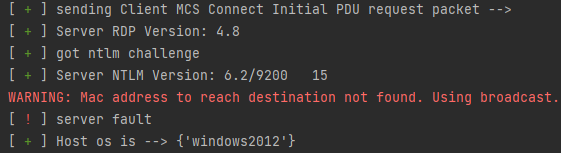

#### windows 2012R2

In [3]:
main("192.168.88.135")

[ + ] sending Client MCS Connect Initial PDU request packet -->
[ + ] Server RDP Version: 4.8
[ + ] got ntlm challenge
[ + ] Server NTLM Version: 6.3/9600   15
[ + ] window size: 64000
[ + ] Host os is --> {'windows2012R2'}


#### windows 2008R2

azure bug i can't figure out

why ntlm has more fields when i am using azure

In [2]:
main("13.93.106.72")

[ + ] sending Client MCS Connect Initial PDU request packet -->
[ + ] Server RDP Version: 4.8
[ + ] got ntlm challenge
[ + ] Server NTLM Version: 1.177/29   83
[ + ] window size: 64240
[ + ] Host os is --> {'windows2012R2', 'windows2012', 'windows2008R2'}


#### windows 10

localhost

In [3]:
main("192.168.88.1")

[ ! ] server fault
[ + ] got ntlm challenge
[ + ] Server NTLM Version: 0.97/74   79
[ + ] window size: 64000
[ + ] Host os is --> {'windows2012R2', 'windows2012', 'windows2016', 'windows2019', 'windows2008R2'}


#### windows 2019

azure again

In [4]:
main("20.105.196.179")

[ ! ] server fault
[ + ] got ntlm challenge
[ + ] Server NTLM Version: 0.99/69   115
[ + ] window size: 64240
[ + ] Host os is --> {'windows2012R2', 'windows2012', 'windows2016', 'windows2019', 'windows2008R2'}


## fix ntlm praser

In [3]:
from ntlm_nego import ntlm_check

In [78]:
class NtlmNegoParser(Structure):
        commonHdr = (
        ('CSSP', 'd'),
        ('version', 'B'),
            
        ('idk1', 'd'),
        ('idk2', 'd'),
        ('ntlm', 'i'),
        ('ntlm', 'h'),
        ('ntlm', 'b'),
        ('ntlmtype', 'i'),
        ('lengthNTLM', 'h'),
        ('maxlength', 'h'),
        ('offest', 'i'),
        ('flags1', 'B'),
        ('flags2', 'B'),
        ('flags3', 'B'),
        ('flags4', 'B'),
        ('ntlmserverchallange', 'i'),
        ('ntlmserverchallange2', 'i'),
        ('reserved', 'd'),
        ('targetLen', 'H'),
        ('targetMaxLen', 'H'),
        ('targetoffest', 'i'),
        ('MajorVersion', 'B'),
        ('MinorVersion', 'B'),
            ('build', 'H'),
            ('pad', 'H'),
            ('pad', 'B'),
            ('revision', 'B'),
        ('rest', ':=""'),
    )

In [79]:
(NtlmNegoParser(a.rawData).fields)

{'CSSP': 3.328772525215912e-294,
 'version': 161,
 'idk1': -1.0779815759189942e+205,
 'idk2': 1.31972359196284e+98,
 'ntlm': 2,
 'ntlmtype': 167772160,
 'lengthNTLM': 2560,
 'maxlength': 14336,
 'offest': 889192448,
 'flags1': 130,
 'flags2': 137,
 'flags3': 226,
 'flags4': 188,
 'ntlmserverchallange': 155705969,
 'ntlmserverchallange2': 10713043,
 'reserved': -6.406665904585923e-145,
 'targetLen': 41472,
 'targetMaxLen': 16896,
 'targetoffest': 100663296,
 'MajorVersion': 3,
 'MinorVersion': 128,
 'build': 37,
 'pad': 15,
 'revision': 83,
 'rest': b'\x00H\x00I\x00M\x00I\x00\x02\x00\n\x00S\x00H\x00I\x00M\x00I\x00\x01\x00\x1e\x00W\x00I\x00N\x00-\x000\x00O\x00N\x00J\x00V\x00A\x008\x00N\x00H\x00J\x00Q\x00\x04\x00\x12\x00s\x00h\x00i\x00m\x00i\x00.\x00a\x00s\x00m\x00\x03\x002\x00W\x00I\x00N\x00-\x000\x00O\x00N\x00J\x00V\x00A\x008\x00N\x00H\x00J\x00Q\x00.\x00s\x00h\x00i\x00m\x00i\x00.\x00a\x00s\x00m\x00\x05\x00\x12\x00s\x00h\x00i\x00m\x00i\x00.\x00a\x00s\x00m\x00\x07\x00\x08\x00\xbe\xf7V\xb3

In [42]:
a = ntlm_check("192.168.88.135")

[ + ] got ntlm challenge


In [52]:
b = ntlm_check("192.168.88.134")

[ + ] got ntlm challenge


In [39]:
c = ntlm_check("20.105.191.177")

[ + ] got ntlm challenge


In [80]:
class RoadTrip(Structure):
        commonHdr = (
        ('CSSP', 'd'),
        ('version', 'B'),
        ('rest', ':=""'),
    )

In [85]:
RoadTrip(a.rawData)['version']

161

In [44]:
class NtlmNegoParser2(Structure):
        commonHdr = (
        ('MajorVersion', 'B'),
        ('MinorVersion', 'B'),
        ('build', 'H'),
        ('pad', 'H'),
        ('pad', 'B'),
        ('revision', 'B'),
        ('rest', ':=""'),
    )

In [65]:
(NtlmNegoParser(a.rawData).fields)

{'CSSP': 3.328772525215912e-294,
 'idk1': -6.17111546824037e-303,
 'idk2': 1.1321062123298692e+72,
 'ntlm': 0,
 'ntlmtype': 2,
 'lengthNTLM': 10,
 'maxlength': 10,
 'offest': 56,
 'flags1': 53,
 'flags2': 130,
 'flags3': 137,
 'flags4': 226,
 'ntlmserverchallange': 1206022588,
 'ntlmserverchallange2': -1552428279,
 'reserved': 0.0,
 'targetLen': 162,
 'targetMaxLen': 162,
 'targetoffest': 66,
 'MajorVersion': 6,
 'MinorVersion': 3,
 'build': 9600,
 'pad': 0,
 'revision': 15,
 'rest': b'S\x00H\x00I\x00M\x00I\x00\x02\x00\n\x00S\x00H\x00I\x00M\x00I\x00\x01\x00\x1e\x00W\x00I\x00N\x00-\x000\x00O\x00N\x00J\x00V\x00A\x008\x00N\x00H\x00J\x00Q\x00\x04\x00\x12\x00s\x00h\x00i\x00m\x00i\x00.\x00a\x00s\x00m\x00\x03\x002\x00W\x00I\x00N\x00-\x000\x00O\x00N\x00J\x00V\x00A\x008\x00N\x00H\x00J\x00Q\x00.\x00s\x00h\x00i\x00m\x00i\x00.\x00a\x00s\x00m\x00\x05\x00\x12\x00s\x00h\x00i\x00m\x00i\x00.\x00a\x00s\x00m\x00\x07\x00\x08\x00\xbe\xf7V\xb3\xd7\xc3\xd7\x01\x00\x00\x00\x00'}

In [58]:
b.fields


{'CSSP': 8.208965040673767e-304,
 'version': 2,
 'idk1': -6.185355941783614e-303,
 'idk2': 1.6842459529832074e+72,
 'ntlm': 0,
 'ntlmtype': 2,
 'lengthNTLM': 30,
 'maxlength': 30,
 'offest': 56,
 'flags1': 53,
 'flags2': 130,
 'flags3': 138,
 'flags4': 226,
 'ntlmserverchallange': -2020311856,
 'ntlmserverchallange2': -787674286,
 'reserved': 0.0,
 'targetLen': 152,
 'targetMaxLen': 152,
 'targetoffest': 86,
 'MajorVersion': 6,
 'MinorVersion': 2,
 'build': 9200,
 'pad': 0,
 'revision': 15,
 'rest': b'W\x00I\x00N\x00-\x009\x00A\x00B\x003\x007\x005\x00R\x00O\x00R\x005\x00U\x00\x02\x00\x1e\x00W\x00I\x00N\x00-\x009\x00A\x00B\x003\x007\x005\x00R\x00O\x00R\x005\x00U\x00\x01\x00\x1e\x00W\x00I\x00N\x00-\x009\x00A\x00B\x003\x007\x005\x00R\x00O\x00R\x005\x00U\x00\x04\x00\x1e\x00W\x00I\x00N\x00-\x009\x00A\x00B\x003\x007\x005\x00R\x00O\x00R\x005\x00U\x00\x03\x00\x1e\x00W\x00I\x00N\x00-\x009\x00A\x00B\x003\x007\x005\x00R\x00O\x00R\x005\x00U\x00\x07\x00\x08\x00\x17\xe2r\xd3\x84\xc3\xd7\x01\x00\x00\

In [29]:
(NtlmNegoParser(b.rawData[71:]).fields)

{'MajorVersion': 6,
 'MinorVersion': 1,
 'build': 7601,
 'pad': 0,
 'revision': 15,
 'rest': b'S\x00E\x00R\x00V\x00E\x00R\x002\x000\x000\x008\x00\x02\x00\x14\x00S\x00E\x00R\x00V\x00E\x00R\x002\x000\x000\x008\x00\x01\x00\x14\x00S\x00E\x00R\x00V\x00E\x00R\x002\x000\x000\x008\x00\x04\x00\x14\x00s\x00e\x00r\x00v\x00e\x00r\x002\x000\x000\x008\x00\x03\x00\x14\x00s\x00e\x00r\x00v\x00e\x00r\x002\x000\x000\x008\x00\x07\x00\x08\x00\x909\x15\xc2\x82\xc3\xd7\x01\x00\x00\x00\x00'}

In [30]:
(NtlmNegoParser(a.rawData[71:]).fields)

{'MajorVersion': 10,
 'MinorVersion': 0,
 'build': 19041,
 'pad': 0,
 'revision': 15,
 'rest': b'O\x00F\x00E\x00K\x00-\x00P\x00C\x00\x02\x00\x0e\x00O\x00F\x00E\x00K\x00-\x00P\x00C\x00\x01\x00\x0e\x00O\x00F\x00E\x00K\x00-\x00P\x00C\x00\x04\x00\x0e\x00O\x00f\x00e\x00k\x00-\x00P\x00C\x00\x03\x00\x0e\x00O\x00f\x00e\x00k\x00-\x00P\x00C\x00\x07\x00\x08\x00\xcb7\xa6\xc1\x82\xc3\xd7\x01\x00\x00\x00\x00'}

In [31]:
(NtlmNegoParser(c.rawData[71:]).fields)

{'MajorVersion': 10,
 'MinorVersion': 0,
 'build': 17763,
 'pad': 0,
 'revision': 15,
 'rest': b's\x00e\x00r\x00v\x00e\x00r\x002\x000\x001\x009\x00\x02\x00\x14\x00s\x00e\x00r\x00v\x00e\x00r\x002\x000\x001\x009\x00\x01\x00\x14\x00s\x00e\x00r\x00v\x00e\x00r\x002\x000\x001\x009\x00\x04\x00\x14\x00s\x00e\x00r\x00v\x00e\x00r\x002\x000\x001\x009\x00\x03\x00\x14\x00s\x00e\x00r\x00v\x00e\x00r\x002\x000\x001\x009\x00\x07\x00\x08\x00P\xce\xda\xd9\x82\xc3\xd7\x01\x00\x00\x00\x00'}

i have one bit offset

# fix one bit offset

#### windows 2008R2

azure bug i can't figure out

why ntlm has more fields when i am using azure

In [4]:
main("20.105.186.13")

[ + ] sending Client MCS Connect Initial PDU request packet -->
[ + ] Server RDP Version: 4.8
[ + ] got ntlm challenge
[ + ] Server NTLM Version: 6.1/7601   15
[ + ] window size: 64240
[ + ] Host os is --> {'windows2008R2'}


#### windows 10

localhost

In [5]:
main("192.168.88.1")

[ ! ] server fault
[ + ] got ntlm challenge
[ + ] Server NTLM Version: 10.0/19041   15
[ + ] window size: 64000
[ + ] Host os is --> {'windows10'}


#### windows 2019

azure again

In [6]:
main("20.105.191.177")

[ ! ] server fault
[ + ] got ntlm challenge
[ + ] Server NTLM Version: 10.0/17763   15
[ + ] window size: 64240
[ + ] Host os is --> {'windows2019'}


### domain contorller 2012R2

In [7]:
main("192.168.88.135")

[ + ] sending Client MCS Connect Initial PDU request packet -->
[ + ] Server RDP Version: 4.8
[ + ] got ntlm challenge
[ + ] Server NTLM Version: 6.3/9600   15
[ + ] window size: 64000
[ + ] Host os is --> {'windows2012R2'}
